# Getting Started With Julia
## Book Notes

I think I've got the general grasp of Julia, but I generally tend to like to be comprehensive in my understanding.
And, given Julia's expressive capabilities on par with Python, alongside it's type support, I really want to know everything about it.

So I've bought this book on Julia, and I'm writing up the notes I take while I read through it on this Jupyter Notebook.

# CH1 - Rationale for Julia
Loving Jupyter Notebook's Markdown integration. It's actually quite good.

Julia was made to support fast prototyping while also supporting maximum performance, two qualities that have often been seen as being opposed to each other.



# CH2 - Installing Julia

You can run scripts from the REPL using include

```
    include("example.jl")
    
```

Example 2D Plotting library


In [2]:
Pkg.add("Winston")
using Winston


INFO: Package Winston is already installed
INFO: METADATA is out-of-date — you may not have the latest version of Winston
INFO: Use `Pkg.update()` to get the latest versions of your packages


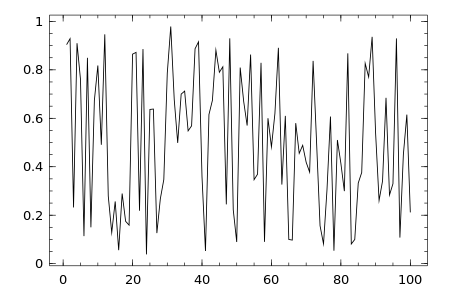

In [4]:
plot(rand(100))

# CH3 - Variables, Types and Operations

As a dynamic strongly-typed language, all values have a type at runtime.

Julia distinguishes between characters ```x = 'a'``` and strings ```x = "a"```.

Variables do not need to have a type, and if not given a specified type, the type of the value they reference can change

everything in julia is an expression - no statements, so like c the following should work ```a = b = c = 3```

In [15]:
a = b = c = 3
(a, b, c)

(3, 3, 3)

Semicolons act as sequencers of expressions and supress their output value.

mulitline comments are done using ```#=``` and ```=# ```

Print with colour ```print_with_color``` allows printing with colour

In [20]:
print_with_color(:red, "This line is printed in red, because... I want to kill you!!!!")

This line is printed in red, because... I want to kill you!!!!

Symbols are also objects and can be specified by precluding the symbol name with ```:```

In [21]:
typeof(:an_example_name)

Symbol

In [22]:
fieldnames(:an_example_name)

0-element Array{Symbol,1}

Variables in julia can be annotated with type constraints only allowing values with the specified type to be stored in them. This allows for better documentation as well as potentially allowing the julia compiler to produce more optimized code.

In [26]:
function example(x)
    x::Int = 3
    x
end
example(2)

3

Writing type stable code in julia (where a variable only contains one type of value) will allow the compiler to produce faster code.

http://www.johnmyleswhite.com/notebook/2013/12/06/writing-type-stable-code-in-julia/

The above site presents an example underwhich the use of typestable code produces large changes in performance


In [29]:
function sum_of_sins_unstable(n::Integer)
    r = 0         # r is assigned an integer type
    for i in 1:n
        r += sin(3.4)  # r is promoted to float64 type
    end
    r
end

function sum_of_sins_stable(n::Integer)
    r = 0.0       # r is assigned a float64 type
    for i in 1:n
        r += sin(3.4)  # r remains float64 type
    end
    r
end


sum_of_sins_stable (generic function with 1 method)

We can compare the performance of the functions using the ```@time``` macro

In [30]:
@time [sum_of_sins_unstable(100_000) for i in 1:100];

  0.455886 seconds (30.03 M allocations: 459.351 MiB, 11.51% gc time)


In [31]:
@time [sum_of_sins_stable(100_000) for i in 1:100];

  0.141815 seconds (10.06 k allocations: 542.706 KiB)


Which demonstrates the difference in performance

Strings in julia are immutable and can not be index changed once made

Julia also has string interpolation built in for fast string construction - it took Slowthon ages to add this


In [33]:
"$(a) is the value we assigned earlier to a"

"3 is the value we assigned earlier to a"

Julia is also a lot more open about it's slices-like object, in this case called a ranges object


In [34]:
typeof(1:10)

UnitRange{Int64}

N00bthon wouldn't probably allow that. Also, you can iterate over it - very rust

In [35]:
for i in 1:2
    println(i)
end


1
2


Arrays can also be constructed from ranges, and the function ```sizehint(variable, size)``` allows you to ensure the capacity of an array (allowing size pushes before more space is allocated).

In [39]:
Array{Int}(5)

5-element Array{Int64,1}:
 140444859584176
 140444860663600
 140443989191664
 140444859584752
 140444859582928

Like in MATLab, linspace makes linear ranges in arrays

In [42]:
arr_lin = linspace(1,10,5)

1.0:2.25:10.0

In [55]:
arr_ranges = Array(1.00:2.25:10.00)

5-element Array{Float64,1}:
  1.0 
  3.25
  5.5 
  7.75
 10.0 

In [56]:
for i in arr_lin
    print(i, ", ")
end
println("")
for i in arr_ranges
    print(i, ", ")
end

1.0, 3.25, 5.5, 7.75, 10.0, 
1.0, 3.25, 5.5, 7.75, 10.0, 

Brilliant!!! AMAZING!!! Julia has a convention whereby functions which end with a ! mark change their first argument - this is useful for things like in place appends

In [60]:
println(arr_ranges)
append!(arr_ranges, arr_lin)
println(arr_ranges)

[1.0, 3.25, 5.5, 7.75, 10.0]
[1.0, 3.25, 5.5, 7.75, 10.0, 1.0, 3.25, 5.5, 7.75, 10.0]


# CH4 - Functions

Functions have multiple dispatch - rather than dumbthons choice of placing the burden on the programmer to distinguish between types of functions. I.e you have function overloading even though Julia is dynamically typed. Brilliant! I love Julia.